In [297]:
import plotly as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

# Read and clean file
https://www.youtube.com/watch?v=bDhvCp3_lYw

In [298]:
df=pd.read_csv(r"/Users/betosanchez/Desktop/Python Projects/datasets/sleep_health.csv")


In [299]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [300]:
df=df.drop_duplicates()

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


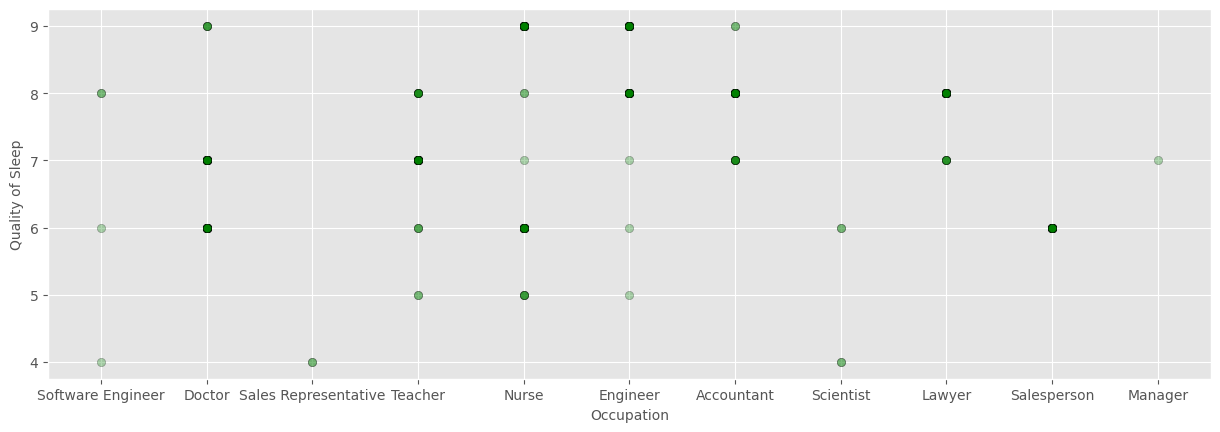

In [302]:
#scatter plot comparing Quality of Sleep to occupation
plt.figure().set_figwidth(15)
plt.scatter(x=df['Occupation'], y=df['Quality of Sleep'], c="green", edgecolor="black", alpha=0.3)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Quality of Sleep', fontsize=10)

plt.show()

<Axes: xlabel='Occupation'>

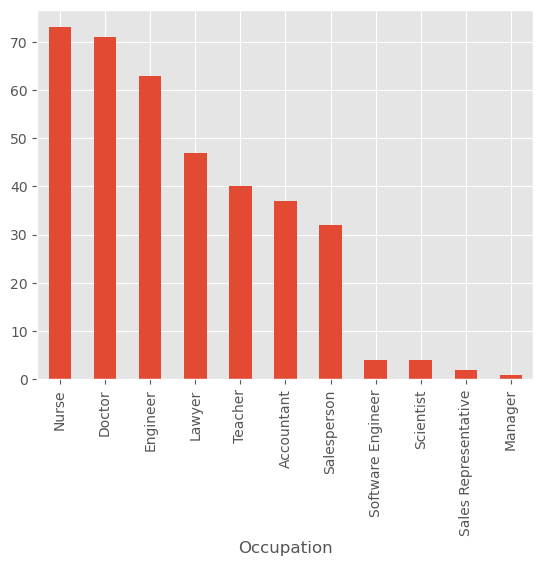

In [303]:
df['Occupation'].value_counts().plot(kind='bar')

# Correlation table and heatmap

In [304]:
#to make better correlations lets change the data types

df_num=df

for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes #gives identifiers to the values in the columns
        
df_num #visualize to confirm the change
        

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,-1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,-1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,-1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,23,68,7000,1
370,371,0,59,5,8.0,9,75,3,3,23,68,7000,1
371,372,0,59,5,8.1,9,75,3,3,23,68,7000,1
372,373,0,59,5,8.1,9,75,3,3,23,68,7000,1


In [305]:

df_num.corr() #correlation table

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,-0.584229,0.990516,0.269343,0.296305,0.431612,0.149882,-0.394287,0.527614,0.583563,-0.225467,0.043844,0.476492
Gender,-0.584229,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,-0.176272,0.217105,-0.014509,-0.362591
Age,0.990516,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,0.572813,-0.225606,0.057973,0.487832
Occupation,0.269343,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.546791,0.043928,-0.105877,0.463242
Sleep Duration,0.296305,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.191704,-0.516455,-0.039533,-0.239109
Quality of Sleep,0.431612,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.147769,-0.659865,0.016791,-0.213003
Physical Activity Level,0.149882,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.271913,0.136971,0.772723,0.236560
Stress Level,-0.394287,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.117545,0.670026,0.186829,0.151893
BMI Category,0.527614,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.724217,0.295585,-0.005059,0.736380
Blood Pressure,0.583563,-0.176272,0.572813,0.546791,-0.191704,-0.147769,0.271913,0.117545,0.724217,1.000000,0.288300,0.119455,0.720646


Some occupations present a wider range of sleep time such as nurses, engineers and softwares engineers; others show a tendency to have more sleep at nigth such as Doctors and lawyers, while others (Sales representatives, scientists, salespeople and managers) show less sleep time. However, this marked differencee in people with less sleep time could be mostly due to a lack of variety from such occupations (Software Engineer with 4 responses;
Scientist, with 4; Sales Representative with 2; Manager with 1). They are not a good sample size, not statistically representative.

<function matplotlib.pyplot.show(close=None, block=None)>

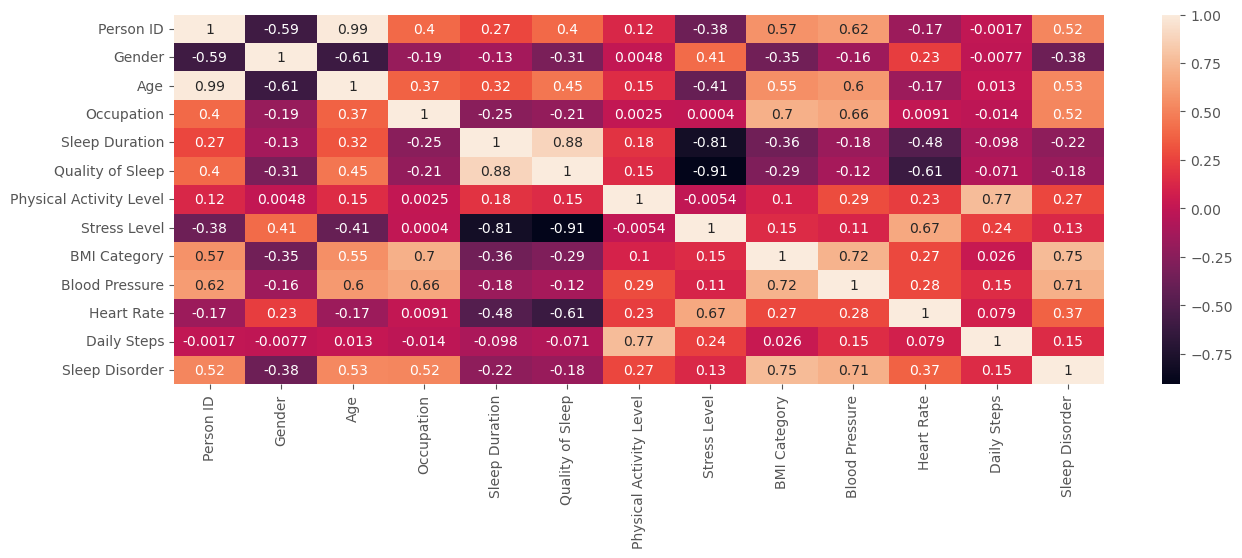

In [283]:
#heatmap to have an "index" of the present correlations:
correlation_mtrx = df_num.corr()
plt.figure().set_figwidth(15)
sns.heatmap(correlation_mtrx, annot=True)
plt.show

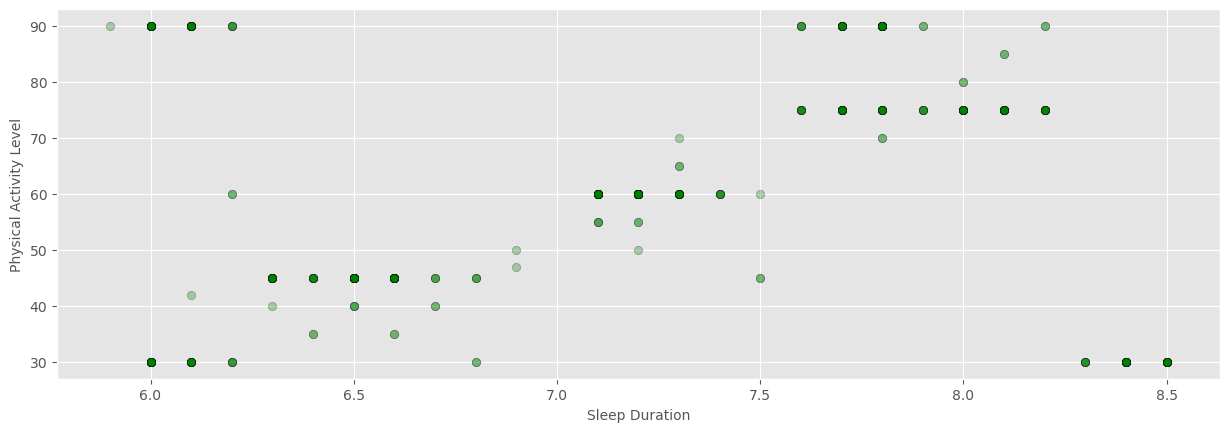

In [273]:
#scatter plot comparing Sleep Duration to Physical Activity Level
plt.figure().set_figwidth(15)

colo=df['Sleep Duration']

plt.scatter(x=df['Sleep Duration'], y=df['Physical Activity Level'], c="green", edgecolor="black", alpha=0.3)
plt.xlabel('Sleep Duration', fontsize=10)
plt.ylabel('Physical Activity Level', fontsize=10)

plt.show()

In comparing Sleep Duration to Physical Activity Level we find a slight visual correlation. However the outliers make the  correlation weak. Perhaps taking out the statistically insignificant professions could help for a better analysis and change the graph:

In [274]:
df['Occupation'] = df['Occupation'].astype(str) #changes boolean values to strings to drop the no desired occupations
#df = df.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 1 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                363 non-null    int64  
 1   Gender                   363 non-null    object 
 2   Age                      363 non-null    int64  
 3   Occupation               363 non-null    object 
 4   Sleep Duration           363 non-null    float64
 5   Quality of Sleep         363 non-null    int64  
 6   Physical Activity Level  363 non-null    int64  
 7   Stress Level             363 non-null    int64  
 8   BMI Category             363 non-null    object 
 9   Blood Pressure           363 non-null    object 
 10  Heart Rate               363 non-null    int64  
 11  Daily Steps              363 non-null    int64  
 12  Sleep Disorder           150 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 39.7+ KB


In [275]:
#df = df[df['Occupation'] != 'Software Engineer', 'Scientist', 'Sales Representative', 'Manager']
df = df[~df['Occupation'].isin(['Software Engineer', 'Scientist', 'Sales Representative', 'Manager'])] #drops the non desired occupations
df["Occupation"].value_counts() #visualize the list of occupations to review the change.

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: count, dtype: int64

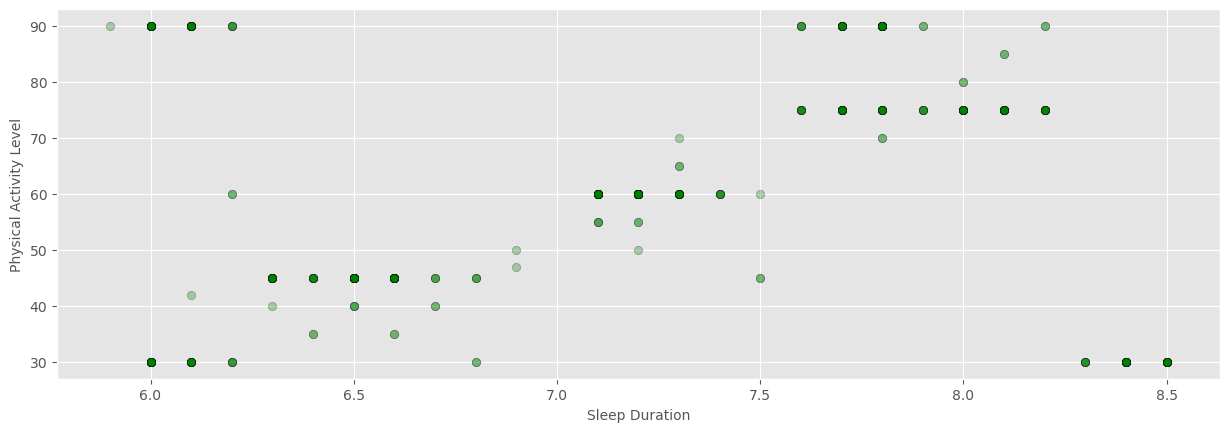

In [276]:
#scatter plot comparing Sleep Duration to Physical Activity Level without professions
plt.figure().set_figwidth(15)

colo=df['Sleep Duration']

plt.scatter(x=df['Sleep Duration'], y=df['Physical Activity Level'], c="green", edgecolor="black", alpha=0.3)
plt.xlabel('Sleep Duration', fontsize=10)
plt.ylabel('Physical Activity Level', fontsize=10)

plt.show()

In comparing the 2 plots there is no difference in the visualization. 

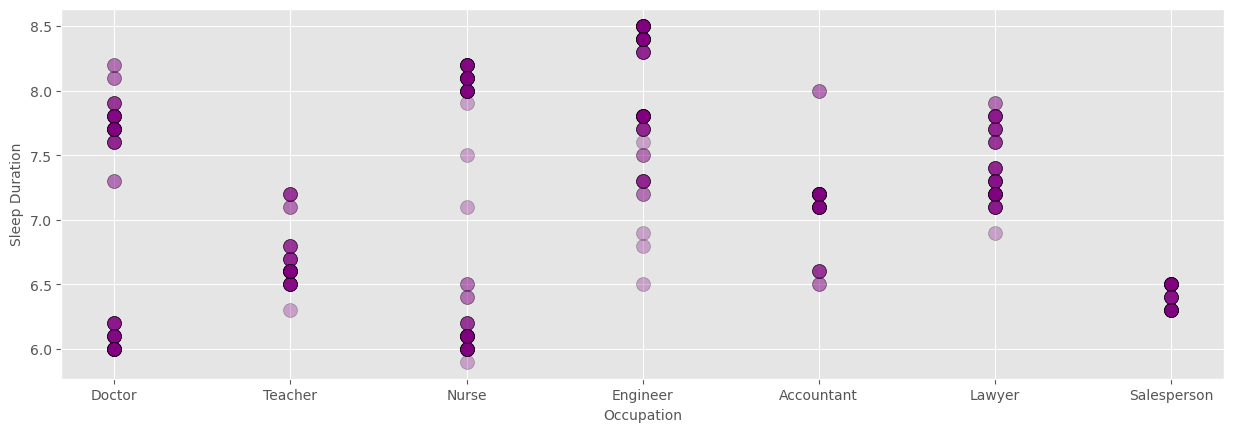

In [277]:
#scatter plot comparing sleep duration to occupation
plt.figure().set_figwidth(15)
#colo=df['Sleep Duration']

plt.scatter(x=df['Occupation'], y=df['Sleep Duration'],c="purple",  edgecolor="black", alpha=0.3, s=100)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Sleep Duration', fontsize=10)
#cbar=plt.colorbar()
#cbar.set_label ("Min to max")
plt.show()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,-1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,-1
6,7,1,29,6,6.3,6,40,7,2,21,82,3500,0
7,8,1,29,1,7.8,7,75,6,0,6,70,8000,-1
8,9,1,29,1,7.8,7,75,6,0,6,70,8000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,4,8.1,9,75,3,3,22,68,7000,1
370,371,0,59,4,8.0,9,75,3,3,22,68,7000,1
371,372,0,59,4,8.1,9,75,3,3,22,68,7000,1
372,373,0,59,4,8.1,9,75,3,3,22,68,7000,1


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,-0.594040,0.990296,0.403116,0.268586,0.403497,0.122184,-0.378038,0.571890,0.615332,-0.165688,-0.001705,0.516255
Gender,-0.594040,1.000000,-0.606972,-0.189231,-0.129449,-0.314225,0.004765,0.405987,-0.351607,-0.156190,0.232509,-0.007661,-0.377110
Age,0.990296,-0.606972,1.000000,0.366870,0.319477,0.449998,0.152848,-0.407587,0.554642,0.601282,-0.166592,0.013342,0.525747
Occupation,0.403116,-0.189231,0.366870,1.000000,-0.251295,-0.205066,0.002539,0.000405,0.702413,0.659367,0.009094,-0.014192,0.518898
Sleep Duration,0.268586,-0.129449,0.319477,-0.251295,1.000000,0.883566,0.183691,-0.807116,-0.359126,-0.175123,-0.483512,-0.097628,-0.223782
Quality of Sleep,0.403497,-0.314225,0.449998,-0.205066,0.883566,1.000000,0.146829,-0.907220,-0.292026,-0.121661,-0.610663,-0.070807,-0.177781
Physical Activity Level,0.122184,0.004765,0.152848,0.002539,0.183691,0.146829,1.000000,-0.005382,0.100361,0.291351,0.227302,0.768903,0.268783
Stress Level,-0.378038,0.405987,-0.407587,0.000405,-0.807116,-0.907220,-0.005382,1.000000,0.149547,0.109919,0.669432,0.238375,0.128426
BMI Category,0.571890,-0.351607,0.554642,0.702413,-0.359126,-0.292026,0.100361,0.149547,1.000000,0.723966,0.272034,0.026324,0.754426
Blood Pressure,0.615332,-0.156190,0.601282,0.659367,-0.175123,-0.121661,0.291351,0.109919,0.723966,1.000000,0.275841,0.151013,0.706976


<function matplotlib.pyplot.show(close=None, block=None)>

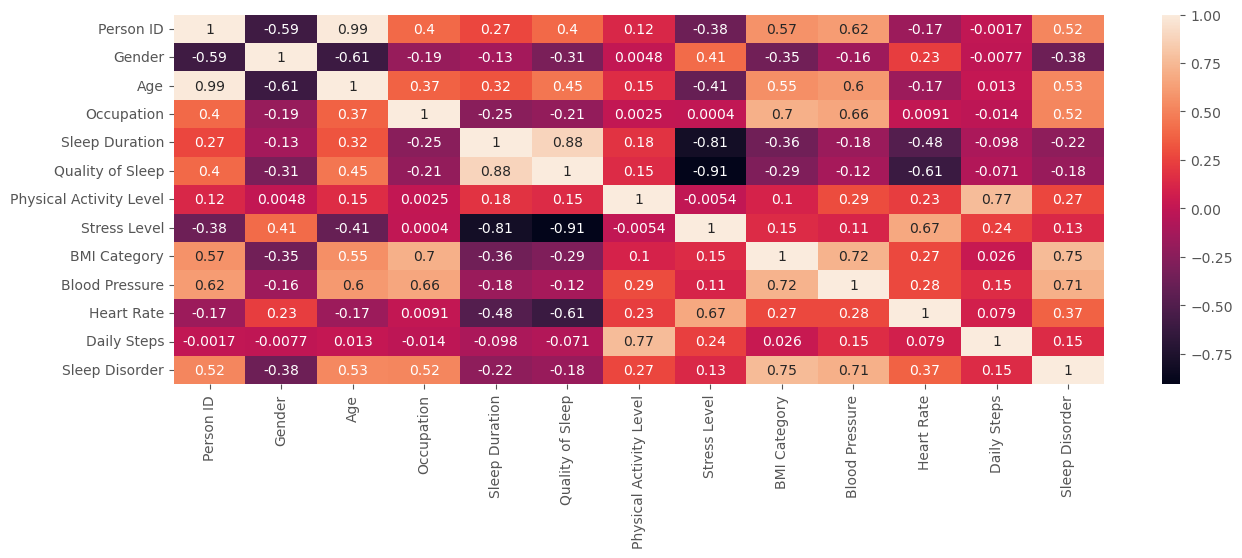

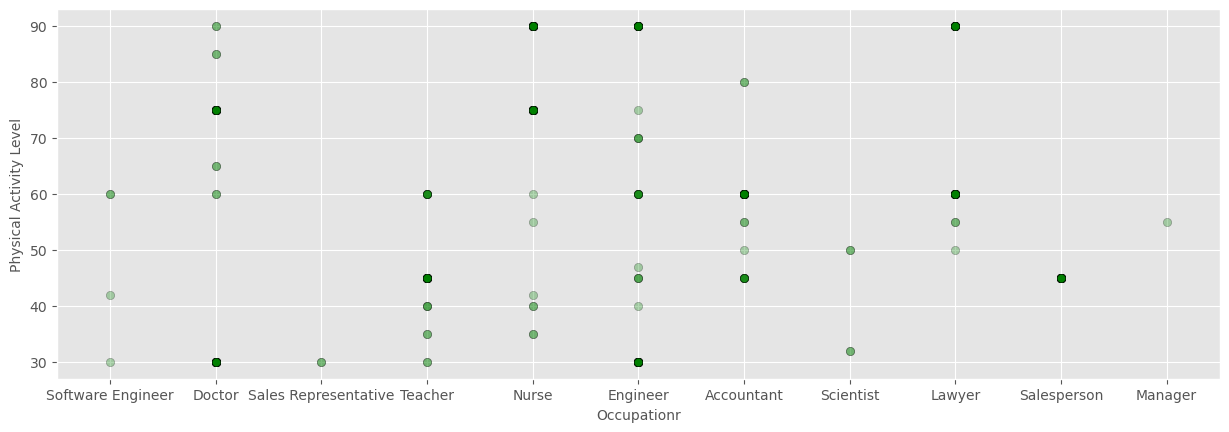

In [218]:
plt.figure().set_figwidth(15)


plt.scatter(x=df['Occupation'], y=df['Physical Activity Level'], c="green", edgecolor="black", alpha=0.3)
plt.xlabel('Occupationr', fontsize=10)
plt.ylabel('Physical Activity Level', fontsize=10)

plt.show()

Conclusion:
Overall there are only a few strong possitive correlations/associations (0.6-0.8, discarding age to ID): BMI to Occupation, Quality Sleep to Sleep Duration, Blood pressure tu Occupation, Blood pressure to age, Stress level to heart rate and Blood pressure to Sleep Disorder.